# SymPy
[SymPy](http://www.sympy.org/ru/) - библиотека символьной математики. 

Абсолютное большинство операций в языках программирования - *жадные*: они выполняются сразу. Например, во время исполнения `a = 2 + 2` переменная `a` становится равна четырем.

**SymPy** позволяет манипулировать отложенными вычислиениями - формулами, как в алгебре или физике. Это позволяет *уменьшить ошибки округления и выполнять высокоуровневые преобразования формул*.

In [2]:
from sympy import *

Импортируем display() для вывода формул 

In [3]:
from IPython.display import display  
init_printing()  # Красивый вывод формул

display(pi)  # Не число, а символ
display(pi.evalf())  # evalf - осуществить расчет.
display(oo.evalf())  # Бесконечность

Функция для вывода исходной формулы и преобразованной

In [4]:
def show_expr(func, expr, *args, **kwargs):
    display(expr)
    display(func(expr, *args, **kwargs))

Создание символьных переменных:

In [5]:
x = Symbol('x')
y = Symbol('y')

display(x+x+y-y)  # Простые формулы автоматически упрощаются

In [6]:
a, b = symbols('a b')
expr = a + 2*b
display(expr)  # a + 2*b

In [78]:
expr1 = (x+1)**2
expr2 = x**2+2*x+1

delta = expr1-expr2
print('Разница между уравнениями:')
display(f'Без упрощения: {delta}')  # Без упрощения
display(f'С упрощением: {simplify(delta)}')  # С упрощением

Разница между уравнениями:


'Без упрощения: -x**2 - 2*x + (x + 1)**2 - 1'

'С упрощением: 0'

Метод **simplify** упрощает уравнение согласно математическим законам.


Для более простой проверки можно использовать сравнение:

In [12]:
expr1.equals(expr2)

True

Замена переменных:

In [13]:
x, y, z = symbols('x y z')

expr = x**3 + 4*x*y - z
display(expr)  # Замена x на 2
display(expr.subs(x, 2))  # Замена x на 2
display(expr.subs([(x, 2), (y, 4), (z, 0)]))  # Замена нескольких переменных

Упрощение тригонометрических выражений:


In [14]:
show_expr(expand_trig, sin(2*x) + cos(2*x))  # expand_trig() преобразовывает тригонометрическое выражение

При расчетах c вещественными числами может появляться ошибка. Для округления можно использовать параметр `chop=True`:

In [16]:
one = cos(1)**2 + sin(1)**2  # Известная формула: sin^2(x)+cos^2(x)=1
display((one - 1).evalf())  # Выведем разницу между int единицей и единицей, которая является результатом преобразования тригонометрической формулы
display((one - 1).evalf(chop=True))  # Делаем тоже самое, но с округлением результата

Расчеты в **SymPy** не очень быстрые, но **SymPy** позволяет экспортировать формулу в более быстрые библиотеки:

In [17]:
import numpy as np
x, y = symbols('x y')
expr = sin(x) + cos(y)  # Это простой пример, но здесь могла быть сложная формула
f = lambdify((x, y), expr, "numpy")  # Теперь формула расчитывается используя numpy

print(f(np.arange(10), np.arange(10, 0, -1)))

[-0.83907153 -0.06965928  0.76379739  0.89502226  0.20336779 -0.67526209
 -0.93305912 -0.3330059   0.57321141  0.95242079]


### Упрощение записи

In [ ]:
x, y, z = symbols('x y z')

`expand()` упрощает уравнение различными методами:

In [18]:
show_expr(expand, (x + 1)**2)

In [19]:
show_expr(expand, (x + 2)*(x - 3))

 `factor()` выносит за скобку общие множители (Наибольший общий делитель)

In [20]:
show_expr(factor, x**3 - x**2 + x - 1)
print('\n\n')
show_expr(factor, x**2*z + 4*x*y*z + 4*y**2*z)

`factor_list()` раскладывает на множители в формате кортежей: (многочлен, его степень),… :

In [21]:
show_expr(factor_list, x**2*z + 4*x*y*z + 4*y**2*z)

`collect()` собирает все вхождения многочлена в одной степени:

In [22]:
show_expr(collect, x*y + x - 3 + 2*x**2 - z*x**2 + x**3, x)

`cancel()` приводит многочлен к наиболее простой дроби^

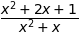

In [23]:
show_expr(cancel, (x**2 + 2*x + 1)/(x**2 + x))

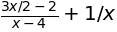

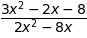

In [24]:
show_expr(cancel, 1/x + (3*x/2 - 2)/(x - 4))

`trigsimp()` упрощает тригонометрические функции:

In [25]:
show_expr(trigsimp, sin(x)**2 + cos(x)**2)

`expand_trig()` раскрывает функции суммы, двойных углов...

In [26]:
show_expr(expand_trig, sin(x + y))

`powsimp()` упрощает «по степеням»

In [27]:
x, y, a, b = symbols('x y a b')

show_expr(powsimp, x**a*x**b)

`expand_power_exp()` раскрывает скобки в степени, когда там сумма:

In [29]:
show_expr(expand_power_exp, x**(a + b))

`expand_power_base()` c `force=True` – возводит каждый множитель из скобок в степень:

In [30]:
show_expr(expand_power_base, (x*y)**a, force=True)

`powdenest()` - упрощает вложенные степени

In [31]:
show_expr(powdenest, (x**a)**b, force=True)

`expand_log()` - упрощает логарифмы:

In [32]:
show_expr(expand_log, log(x*y), force=True)

In [33]:
show_expr(expand_log, log(x/y), force=True)

In [34]:
show_expr(expand_log, log(x**2), force=True)

In [35]:
show_expr(expand_log, log(x**a), force=True) 

In [36]:
show_expr(expand_log, log(x*y), force=True)

`logcombine()` - объединяет логарифмы

In [37]:
show_expr(logcombine, log(x) + log(y), force=True)

In [38]:
show_expr(logcombine, a*log(x), force=True)

#### Задание 1

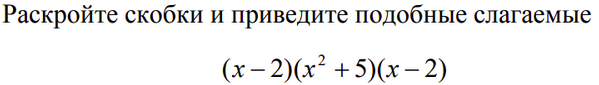

In [ ]:
# Напишите свой код здесь

[Посмотреть ответ на задачу](#exercise_1)

#### Задание 2

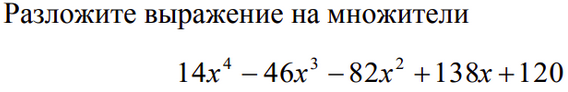

In [ ]:
# Напишите свой код здесь

[Посмотреть ответ на задачу](#exercise_2)

Еще больше функций для упрощения выражений можно найти в [документации](http://docs.sympy.org/latest/tutorial/simplification.html)

## Диференцирование

`diff()` находит производную функции по переменной:

In [39]:
show_expr(diff, cos(x), x)  # Производная cos(x) по x 

In [40]:
show_expr(diff, x**4, x, x, x) # Берется производная x**4 по x три раза

In [43]:
show_expr(diff, x**4, x, 3) # Число в последнем аргументе обозначает степень производной

In [44]:
show_expr(diff, x**4 * z**2 * y/3, x, x, y, z)  # Берется производная по x, потом по х, потом по у, потом по z

**SymPy** позволяет производить отложенное вычисление производной

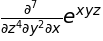

In [45]:
expr = exp(x*y*z)
display(expr)
deriv = Derivative(expr, x, y, y, z, 4)
display(deriv)
display(deriv.doit()) # метод .doit() выполняет отложенное вычисление

## Интегрирование

In [46]:
expr = exp(-x)
display(expr)

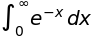

Без отложенного вычисления:


In [47]:
integral = Integral(expr, (x, 0, oo))
display(integral)
display(integral.doit())

print('Без отложенного вычисления:')
display(integrate(expr, (x, 0, oo)))

## Пределы

In [48]:
expr = x**2/exp(x)
display(expr)

In [49]:
print('Прямая подстановка бесконечности вместо x:')
display(expr.subs(x, oo))
print('Предел:')
display(limit(expr, x, oo))

Прямая подстановка бесконечности вместо x:


nan

Предел:


## Разложение в степенной ряд 

In [50]:
expr = exp(sin(x))

# Разложить в окрестности 0 с 4 порядком точности
display(expr.series(x, 0, 4)) 
display(expr.series(x, 0, 4).removeO())

In [51]:
# Разложить в окрестности 0 с 6 порядком точности
display(expr.series(x, 0, 6))

#### Задание 3

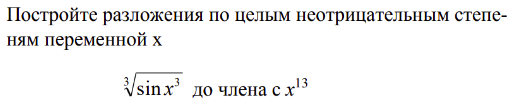

In [ ]:
# Напишите свой код здесь
# Используйте метод real_root, чтобы передать sympy кубический корень

[Посмотреть ответ на задачу](#exercise_3)

## Конечные разности 

In [53]:
f = Function('f')
# первая производная
dfdx = f(x).diff(x)
display(Derivative.as_finite_difference(dfdx)) 

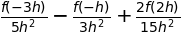

In [54]:
# вторая производная
d2fdx2 = f(x).diff(x, 2)
h = Symbol('h')
display(Derivative.as_finite_difference(d2fdx2, [-3*h,-h,2*h]))

## Решатели

Основной функцией для решения алгебраических уравнений является `solveset()`. 

Синтаксис для набора решений: `solveset(equation, variable=None, domain=S.Complexes)`, где уравнения `equation` могут быть в форме экземпляров `Eq` или выражений, которые считаются равными нулю.

In [55]:
show_expr(solveset, Eq(x**2, 1), x)

In [56]:
show_expr(solveset, Eq(x**2 - 1, 0), x) 

In [57]:
show_expr(solveset, x**2 - 1, x) 

In [58]:
show_expr(solveset, x**2 - x, x) 

In [59]:
show_expr(solveset, x - x, x, domain=S.Reals)  # Находит решения в поле вещественных чисел

In [60]:
show_expr(solveset, sin(x) - 1, x, domain=S.Reals) 

In [61]:
show_expr(solveset, exp(x), x)

In [62]:
show_expr(solveset, cos(x) - x, x) 

In [ ]:
# В форме СЛАУ:
show_expr(linsolve, [x + y + z - 1, x + y + 2*z - 3 ], (x, y, z))


In [64]:
# В векторной форме:
show_expr(linsolve, Matrix(([1, 1, 1, 1], [1, 1, 2, 3])), (x, y, z))

⎡1  1  1  1⎤
⎢          ⎥
⎣1  1  2  3⎦

In [65]:
# С заданием матрицы:
M = Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
system = A, b = M[:, :-1], M[:, -1]
show_expr(linsolve, system, x, y, z)

⎛⎡1  1  1⎤  ⎡1⎤⎞
⎜⎢       ⎥, ⎢ ⎥⎟
⎝⎣1  1  2⎦  ⎣3⎦⎠

In [67]:
# Решатели 
show_expr(solveset, x**3 - 6*x**2 + 9*x, x)

In [69]:
display(roots(x**3 - 6*x**2 + 9*x, x))

# Дифференциальные уравнения

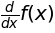

In [70]:
f, g = symbols('f g', cls=Function)  # Инициализируем красивые символы

display(f(x).diff(x))  # Красиво выводим дифференциальное уравнение

Задаем уравнение с помощью `Eq`:

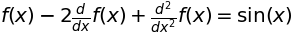

In [74]:
diffeq = Eq(f(x).diff(x, x)-2*f(x).diff(x) + f(x), sin(x))
display(diffeq)  

Выводим решение уравнения:

In [75]:
display(dsolve(diffeq, f(x)))

# Ответы на задания

<a name="exercise_1"></a>
## Ответ на задачу 1 (раскрыть скобки и привести подобные слагаемые)

In [ ]:
expr = (x-2)*(x**2+5)*(x-2)
display(expand(expr))

<a name="exercise_2"></a>
## Ответ на задачу 2 (разложить на множители)

In [ ]:
 expr = (14*x**4)-(46*x**3)-(82*x**2)+(138*x)+(120)
 display(factor(expr))

<a name="exercise_3"></a>
## Ответ на задачу 3 (степенное разложение)




In [ ]:
import math
expr = expand_trig(real_root(sin(x**3), 3))
display(expr.series(x, 0, 15)) 

                          ⎛  2         ⎞│          ⎛                        ⎛ 
                        7 ⎜ d          ⎟│          ⎜                        ⎜ 
                       x ⋅⎜───(sign(x))⎟│          ⎜    ⎛d          ⎞│      ⎜─
                          ⎜  2         ⎟│          ⎜  2⋅⎜──(sign(x))⎟│      ⎜ 
 4 ⎛d          ⎞│         ⎝dx          ⎠│x=0    10 ⎜    ⎝dx         ⎠│x=0   ⎝d
x ⋅⎜──(sign(x))⎟│    + ───────────────────── + x  ⋅⎜- ─────────────────── + ──
   ⎝dx         ⎠│x=0             2                 ⎝           9              

 3         ⎞│   ⎞       ⎛    ⎛  2         ⎞│      ⎛  4         ⎞│   ⎞         
d          ⎟│   ⎟       ⎜    ⎜ d          ⎟│      ⎜ d          ⎟│   ⎟         
──(sign(x))⎟│   ⎟       ⎜  7⋅⎜───(sign(x))⎟│      ⎜───(sign(x))⎟│   ⎟         
 3         ⎟│   ⎟       ⎜    ⎜  2         ⎟│      ⎜  4         ⎟│   ⎟         
x          ⎠│x=0⎟    13 ⎜    ⎝dx          ⎠│x=0   ⎝dx          ⎠│x=0⎟    ⎛ 15⎞
────────────────⎟ + x  ⋅⎜- ──────────────────── + ─